# Objectif de ce notebook : visualiser l'évolution des collaborations dans un groupe d'universités sur plusieurs années

Exemple : Evolution des collaborations entre membres de l'alliance EUniwell entre 2019 et 2023 dans Scopus  


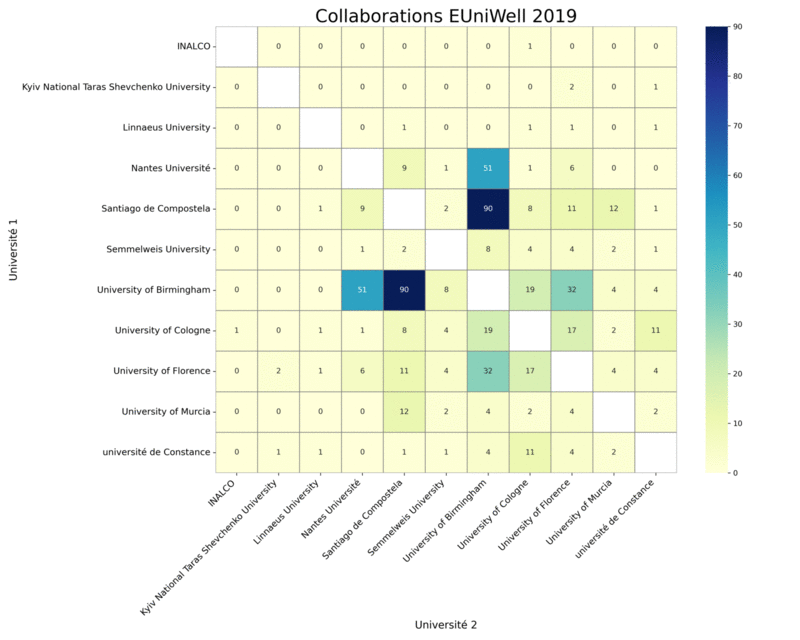

## Étape 1 : Importer les bibliothèques nécessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from urllib.parse import quote

## Étape 2 : Définir la liste des universités et leurs IDs

In [2]:
universities = {
    "University of Cologne": "60024025",
    "University of Birmingham": "60019702",
    "University of Florence": "60021859",
    "Nantes Université": "60032006",
    "Semmelweis University": "60024812",
    "University of Murcia": "60000130",
    "Kyiv National Taras Shevchenko University": "60023137",
    "Linnaeus University": "60104372",
    "INALCO": "60107416",
    "Santiago de Compostela": "60028419",
    "université de Constance": "60025525"
}

## Étape 3 : Définir les années à analyser

years = [2019, 2020, 2021, 2022, 2023]

## Étape 4 : Définir votre clé API

api_key = "xxx"

## Étape 5 : Définir l'URL de base de l'API

base_url = "https://api.elsevier.com/content/search/scopus"

## Étape 6 : Fonction pour obtenir le nombre de collaborations

def get_collaborations(uni1_id, uni2_id, year):
    query = f"AF-ID({uni1_id}) AND AF-ID({uni2_id}) AND PUBYEAR = {year}"
    encoded_query = quote(query)
    url = f"{base_url}?query={encoded_query}&apiKey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return int(data['search-results']['opensearch:totalResults'])
    else:
        return 0

## Étape 7 : Récupérer le nombre de collaborations pour toutes les combinaisons d'universités et années

In [4]:
results = []

for year in years:
    for uni1_name, uni1_id in universities.items():
        for uni2_name, uni2_id in universities.items():
            if uni1_id != uni2_id:
                count = get_collaborations(uni1_id, uni2_id, year)
                results.append({
                    "Year": year,
                    "University 1": uni1_name,
                    "University 2": uni2_name,
                    "Collaborations": count
                })



NameError: name 'years' is not defined

## Étape 8 : Convertir les résultats en DataFrame

In [5]:
df = pd.DataFrame(results)

## Étape 9 : Sauvegarder les résultats dans un fichier CSV


In [6]:
df.to_csv('collaborations_results.csv', index=False)

## Étape 10 : Fonction pour créer une heatmap pour une année spécifique


In [7]:
def plot_heatmap_for_year(df, year, save_path):
    df_year = df[df['Year'] == year]
    df_pivot = df_year.pivot_table(index='University 1', columns='University 2', values='Collaborations', fill_value=0)
    
    # Assurer que la matrice est symétrique
    df_pivot = df_pivot.reindex(columns=df_pivot.index, fill_value=0)
    
    # Créer un masque pour les intersections identiques
    mask = np.zeros_like(df_pivot, dtype=bool)
    np.fill_diagonal(mask, True)
    
    plt.figure(figsize=(15, 12))  # Augmenter la taille de la figure
    sns.heatmap(df_pivot, annot=True, cmap="YlGnBu", cbar=True, mask=mask, linewidths=.5, linecolor='gray')
    plt.title(f'Collaborations EUniWell {year}', fontsize=24)  # Titre personnalisé avec taille augmentée
    plt.xlabel('Université 2', fontsize=14)
    plt.ylabel('Université 1', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotation et alignement des étiquettes de l'axe des x
    plt.yticks(rotation=0, fontsize=12)  # Taille des étiquettes de l'axe des y
    plt.tight_layout()  # Ajuster le layout pour éviter que les étiquettes soient coupées
    plt.savefig(save_path, dpi=300)  # Sauvegarder l'image en PNG avec une haute résolution
    plt.close()



## Étape 11 : Créer et sauvegarder des heatmaps pour chaque année


In [8]:
for year in years:
    save_path = f'heatmap_collaborations_{year}.png'
    plot_heatmap_for_year(df, year, save_path)

print("CSV et heatmaps créés et sauvegardés pour chaque année.")

NameError: name 'years' is not defined